In [51]:
import albumentations
import cv2
import dxcam
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import util

from matplotlib.collections import PatchCollection

In [60]:
list(np.ones((1, 100))[0])

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [52]:
# https://sheldonsebastian94.medium.com/resizing-image-and-bounding-boxes-for-object-detection-7b9d9463125a
def resize_image(img_arr, bboxes, h, w):
    """
    :param img_arr: original image as a numpy array
    :param bboxes: bboxes as numpy array where each row is 'x_min', 'y_min', 'x_max', 'y_max', "class_id"
    :param h: resized height dimension of image
    :param w: resized weight dimension of image
    :return: dictionary containing {image:transformed, bboxes:['x_min', 'y_min', 'x_max', 'y_max', "class_id"]}
    """
    # create resize transform pipeline
    transform = albumentations.Compose(
        [albumentations.Resize(height=h, width=w, always_apply=True)],
        bbox_params=albumentations.BboxParams(format='pascal_voc', label))

    transformed = transform(image=img_arr, bboxes=bboxes)

    return transformed

In [2]:
window_region = util.get_window_region()
camera = dxcam.create(region=window_region)

In [ ]:
frame = camera.grab()
cv2.imshow("DST", frame[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

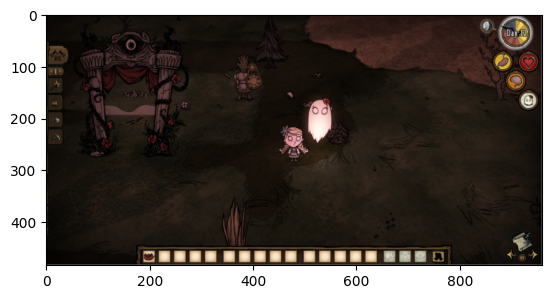

In [43]:
frame = camera.grab()
plt.imshow(frame)
plt.show()

In [44]:
resized_frame = cv2.resize(frame, (128, 128))

In [45]:
selective_search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
selective_search.setBaseImage(resized_frame)

In [46]:
selective_search.switchToSelectiveSearchFast()

In [47]:
roi = selective_search.process()

In [ ]:
def resize_bbox(bboxes, h, w):
    

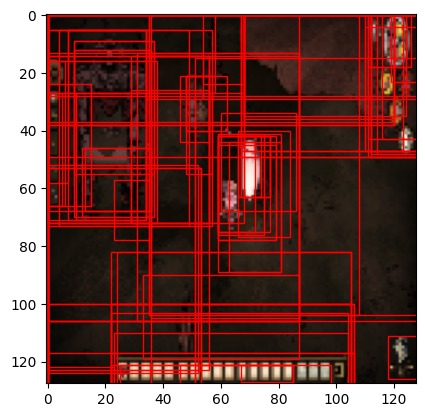

In [50]:
fig, ax = plt.subplots()
ax.imshow(resized_frame)
for i in range(0, 100):
    rect = patches.Rectangle((roi[i][0], roi[i][1]), roi[i][2], roi[i][3], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_artist(rect)
plt.show()

In [ ]:
#for i in range(0, 100):
    

In [ ]:
roi

In [ ]:
frame.reshape((512, 512, 3))

In [ ]:
# get images, annotate

# albumentations resize image and bounding boxes to 512, 256, etc

# load resnet50 
# freeze feature extractor

# implement or find SSD architecture

# train, resize bbox to original, show with original image